In [46]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


In [47]:
PATH = './data/iris_dataset.csv'

dataset = pd.read_csv(PATH, na_values='NA')
dataset.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
dataset.isnull().any()

sepal_length_cm    False
sepal_width_cm     False
petal_length_cm    False
petal_width_cm      True
class              False
dtype: bool

In [49]:
dataset.describe(include='all')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
count,150.000000,150.000000,150.000000,145.000000,150
unique,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.644627,3.054667,3.758667,1.236552,NaN
std,1.312781,0.433123,1.764420,0.755058,NaN
min,0.055000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.400000,NaN
50%,5.700000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [50]:
dataset['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [51]:
dataset['class'] = dataset['class'].map(lambda x: 'Iris-setosa' if x == 'Iris-setossa' else 'Iris-versicolor' if x == 'versicolor' else x)
dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

<AxesSubplot:xlabel='petal_width_cm', ylabel='Density'>

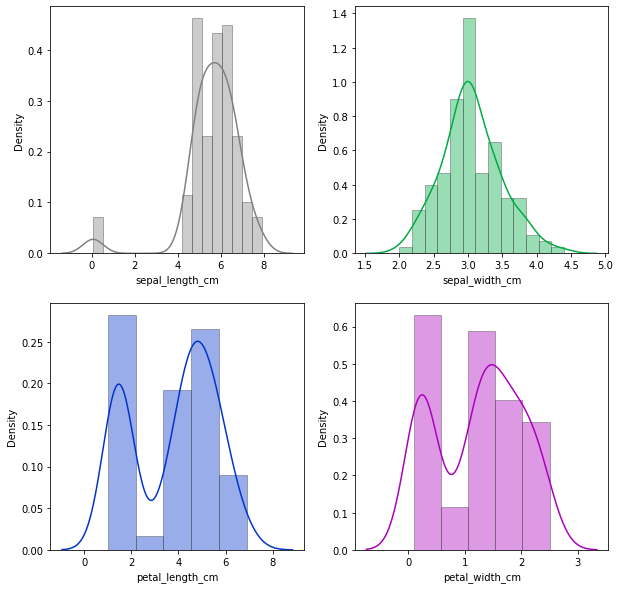

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.distplot(dataset.sepal_length_cm, ax=axs[0, 0], color='#808080', hist_kws=dict(
    edgecolor='#404040', linewidth=1))
sns.distplot(dataset.sepal_width_cm, ax=axs[0, 1], color='#00AA44', hist_kws=dict(
    edgecolor='#404040', linewidth=1))
sns.distplot(dataset.petal_length_cm, ax=axs[1, 0], color='#0033cc', hist_kws=dict(
    edgecolor='#404040', linewidth=1))
sns.distplot(dataset.loc[dataset.petal_width_cm.notnull(), 'petal_width_cm'], ax=axs[1, 1],
             color='#aa00bb', hist_kws=dict(edgecolor='#404040', linewidth=1))


/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lorenzo

<AxesSubplot:xlabel='petal_width_cm'>

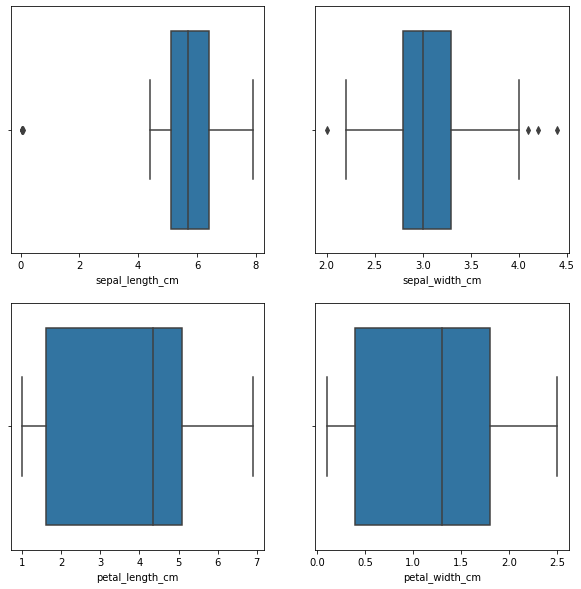

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(dataset.sepal_length_cm, ax=axs[0, 0])
sns.boxplot(dataset.sepal_width_cm, ax=axs[0, 1])
sns.boxplot(dataset.petal_length_cm, ax=axs[1, 0])
sns.boxplot(dataset.loc[dataset.petal_width_cm.notnull(), 'petal_width_cm'], ax=axs[1, 1])

In [54]:
dataset.petal_width_cm.fillna(dataset.petal_width_cm.median(), inplace=True)
dataset.describe(include='all')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.644627,3.054667,3.758667,1.238667,NaN
std,1.312781,0.433123,1.764420,0.742369,NaN
min,0.055000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.400000,NaN
50%,5.700000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [55]:
dataset['class'] = dataset['class'].map(lambda x: 1 if x == "Iris-setosa" else -1)


In [56]:
dataset.describe(include="all")

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667,1.238667,-0.333333
std,1.312781,0.433123,1.764420,0.742369,0.945968
min,0.055000,2.000000,1.000000,0.100000,-1.000000
25%,5.100000,2.800000,1.600000,0.400000,-1.000000
50%,5.700000,3.000000,4.350000,1.300000,-1.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


In [57]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score


In [58]:
def accuracy_report(y_true, y_pred):
    print(f"Accuracy of the model: {accuracy_score(y_true, y_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_pred):.3f}")

In [59]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [77]:
model = LogisticRegression(solver='liblinear')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score = cross_validate(model, X, y, cv=cv, return_train_score=True, scoring=('roc_auc', 'accuracy'))
pd.DataFrame(cv_score)

,fit_time,score_time,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy
0,0.001940,0.002367,1.0,1.0,1.0,1.0
1,0.001180,0.002246,1.0,1.0,1.0,1.0
2,0.001949,0.003707,1.0,1.0,1.0,1.0
3,0.002044,0.004758,1.0,1.0,1.0,1.0
4,0.001207,0.001813,1.0,1.0,1.0,1.0
5,0.001080,0.002072,1.0,1.0,1.0,1.0
6,0.001312,0.002195,1.0,1.0,1.0,1.0
7,0.002143,0.002115,1.0,1.0,1.0,1.0
8,0.002342,0.003630,1.0,1.0,1.0,1.0
9,0.002042,0.002874,1.0,1.0,1.0,1.0


In [78]:
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))
accuracy_report(y_train, model.predict(X_train))
accuracy_report(y_test, model.predict(X_test))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy of the model: 1.000
ROC AUC: 1.000
Accuracy of the model: 1.000
ROC AUC: 1.000


In [79]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}